<a href="https://colab.research.google.com/github/ArdhraAnil/SCT_DS_3/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/bank-direct-marketing-campaigns.csv.zip")
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994

In [ ]:
data_encoded= pd.get_dummies(data,drop_first=True)
print(data_encoded.head())

   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_nov  \
0          -36.4      4.857       5191.0            False  ...      False   
1          -36.4      4.857       5191.0            False  ...      False   
2          -36.4      4.857       5191.0            False  ...      False   
3          -36.4      4.857       5191.0            False  ...      False   
4          -36.4      4.857       5191.0            False  ...      False   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False      False             True            Fals

In [ ]:
x=data_encoded.drop(columns=['y_yes'])
y=data_encoded['y_yes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

accuracy: 0.900623128591082
classification report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.95     10968
        True       0.64      0.26      0.37      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357

confusion matrix:
 [[10768   200]
 [ 1028   361]]


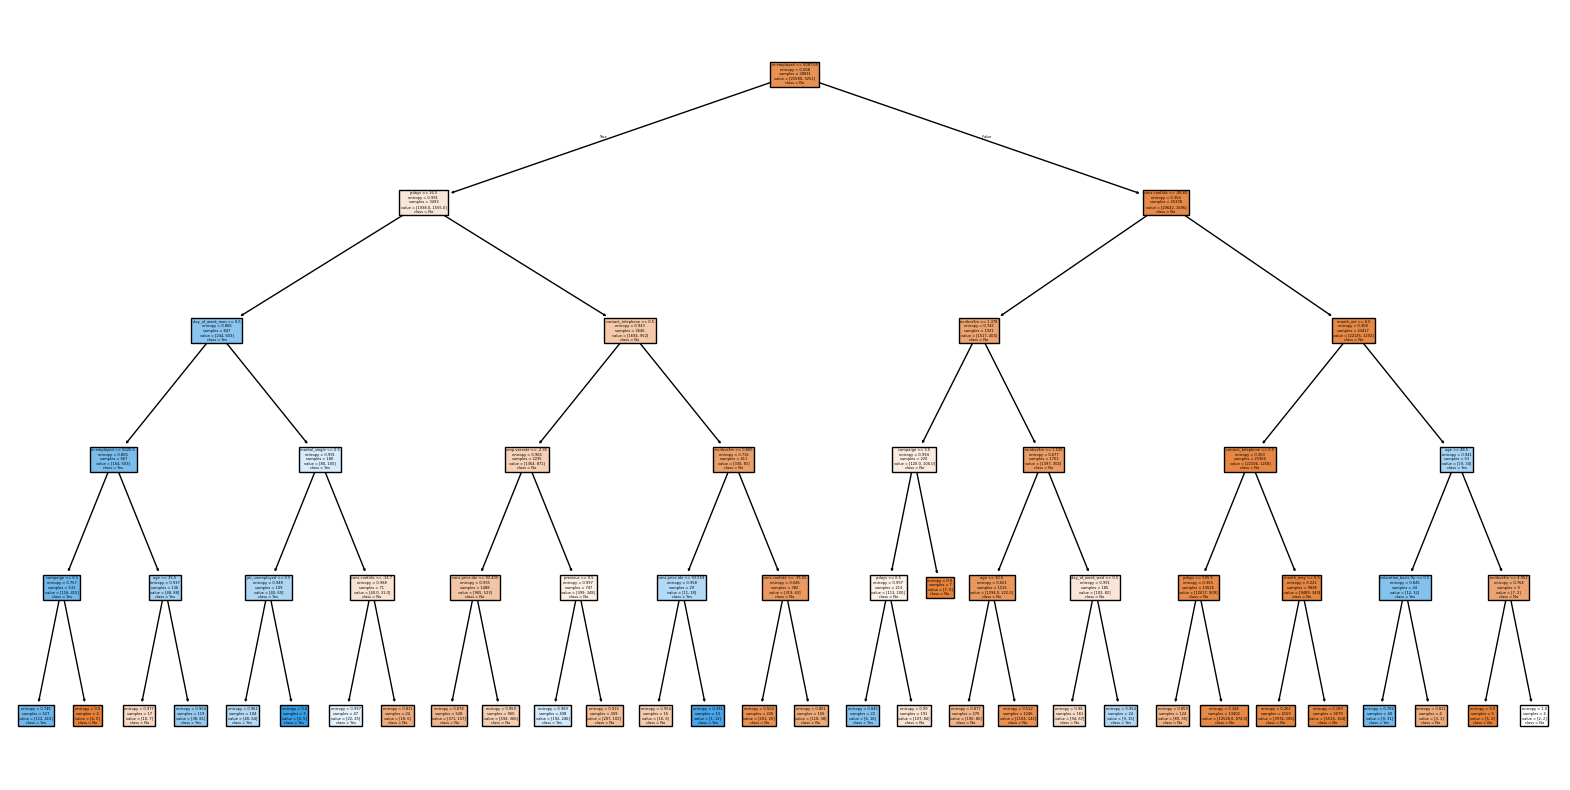

In [ ]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,feature_names=x.columns,class_names=['No','Yes'])
plt.show()